# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing Thompson Sampling

In [10]:
import random
N = 500
d = 10
ads_selected = []
times_rewarded_0 = [0] * d
times_rewarded_1 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        beta_variate = random.betavariate(times_rewarded_1[i]+1, times_rewarded_0[i]+1)
        if beta_variate > max_random:
            max_random = beta_variate
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        times_rewarded_1[ad] += 1
    else:
        times_rewarded_0[ad] += 1
    total_reward += reward

# Visualising the results 

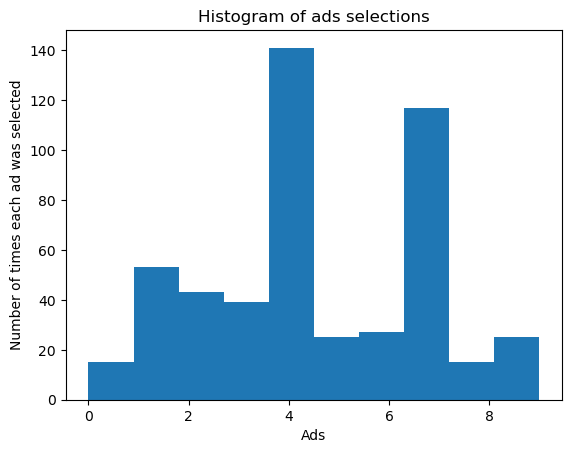

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()